In [1]:
%load_ext autoreload
%autoreload 2

In [209]:
from grounding.data_processing.datasets import EvalAlfredHLActionDataset
from grounding.evaluation.grounding_evaluation import GroundingTest
import pandas as pd

# data_train = EvalAlfredHLActionDataset('alfred/data/json_feat_2.1.0/train')
data_valid_seen = EvalAlfredHLActionDataset('alfred/data/json_feat_2.1.0/valid_seen')
data_valid_unseen = EvalAlfredHLActionDataset('alfred/data/json_feat_2.1.0/valid_unseen')

## Visualize individual actions

Act914_ToggleObject(['floorlamp'])
INSTRUCTION: Turn on the light of the lamp.
COMMAND:     Toggle floorlamp. 


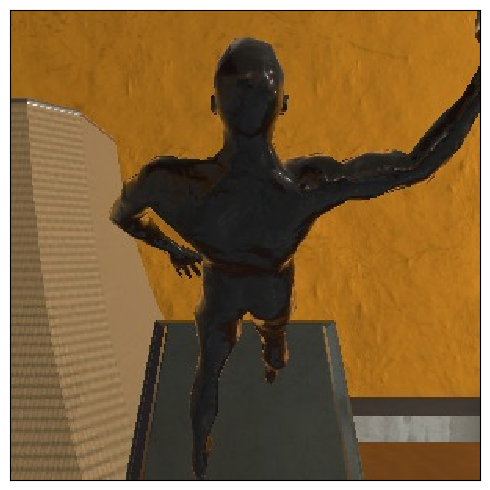

In [33]:
data_valid_unseen.inspect_action(914)

## Choose actions for evaluation

In [210]:
seen_actions = data_valid_seen.get_actions_by_objects(action_types=['PickupObject'])
unseen_actions = data_valid_unseen.get_actions_by_objects(action_types=['PickupObject'])

In [211]:
sorted(seen_actions.keys())

['alarmclock',
 'apple',
 'baseballbat',
 'book',
 'bowl',
 'box',
 'bread',
 'butterknife',
 'candle',
 'cd',
 'cellphone',
 'cloth',
 'creditcard',
 'cup',
 'dishsponge',
 'egg',
 'fork',
 'glassbottle',
 'handtowel',
 'keychain',
 'knife',
 'ladle',
 'laptop',
 'lettuce',
 'mug',
 'newspaper',
 'pan',
 'pen',
 'pencil',
 'pillow',
 'plate',
 'plunger',
 'pot',
 'potato',
 'remotecontrol',
 'soapbar',
 'soapbottle',
 'spatula',
 'spoon',
 'spraybottle',
 'statue',
 'tennisracket',
 'tissuebox',
 'toiletpaper',
 'tomato',
 'vase',
 'watch',
 'wateringcan',
 'winebottle']

In [249]:
# start at 1
img_no = 8
object = 'bowl'

11/22  1/12 unseen
Act_VUNSEEN_31_PickupObject(['bowl'])
alfred/data/json_feat_2.1.0/valid_unseen/pick_clean_then_place_in_recep-Bowl-None-Cabinet-10/trial_T20190909_061130_844814
INSTRUCTION: Pick up the bowl that is near the potted plant in the corner of the island.
COMMAND:     Pick up the bowl. 


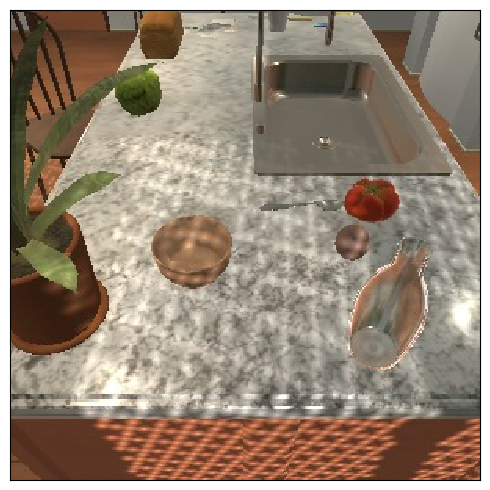

In [253]:
nb_seen = len(seen_actions[object])
nb_unseen = len(unseen_actions[object])
if img_no < nb_seen:
    print(f"{img_no}/{nb_seen + nb_unseen} ({img_no}/{nb_seen} seen)")
    seen_actions[object][img_no - 1].show()
else:
    print(f"{img_no}/{nb_seen + nb_unseen}  {img_no - nb_seen}/{len(unseen_actions[object])} unseen")
    unseen_actions[object][img_no - nb_seen - 1].show()
img_no += 1
if img_no > nb_seen + nb_unseen:
    img_no = 1

## Build an evaluation dataset

In [33]:
object_1 = 'tomato'
object_2 = 'lettuce'
generic = 'vegetable'
unrelated = 'vase'
instruction_template = "Grab the {object} in front of you."
actions_1 = data.get_actions_by_indices([112,1092,3770,4474,4928])
actions_2 = data.get_actions_by_indices([310,621,2001,2968])
# actions_both = data.get_actions_by_indices([876,882,2516,459,3311,4510])
actions_both = data.get_actions_by_indices([2516,3311,4510])
actions_unrelated = data.get_actions_by_indices([4627, 1230, 1566, 2986])

grounding_test = GroundingTest(
    object_1,
    object_2,
    generic,
    unrelated,
    instruction_template,
    actions_1, actions_2, actions_both, actions_unrelated)

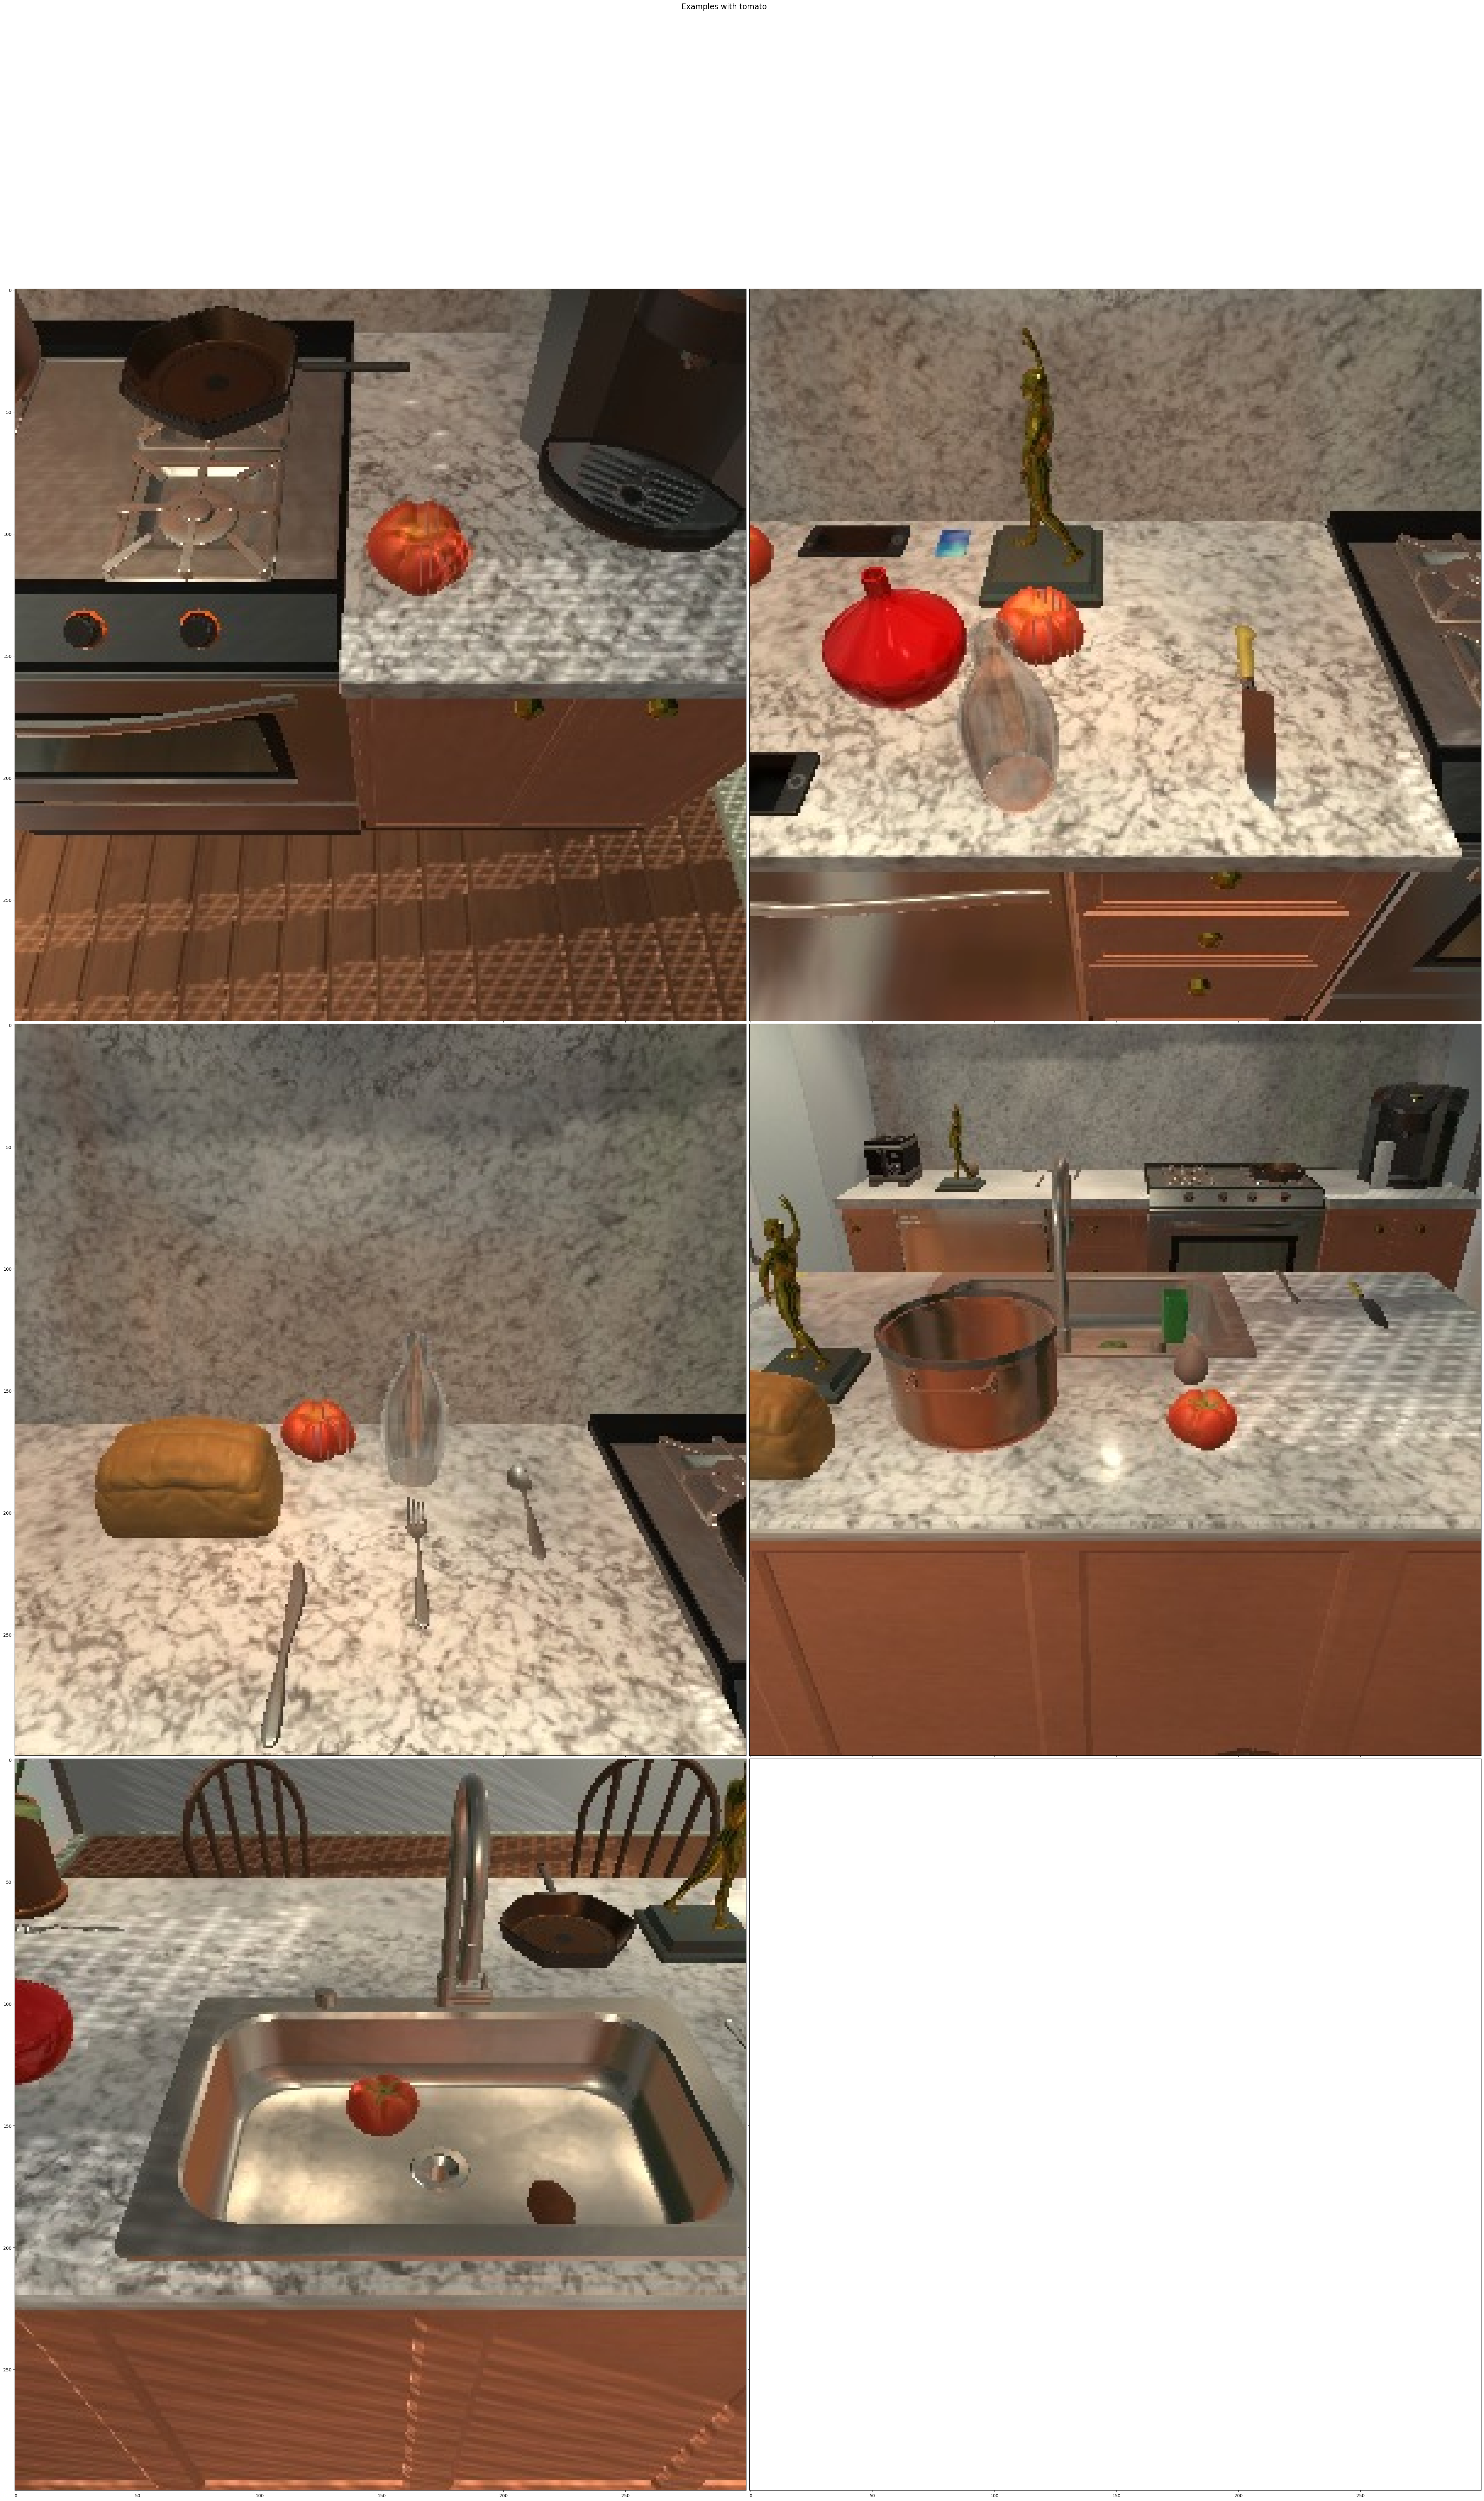

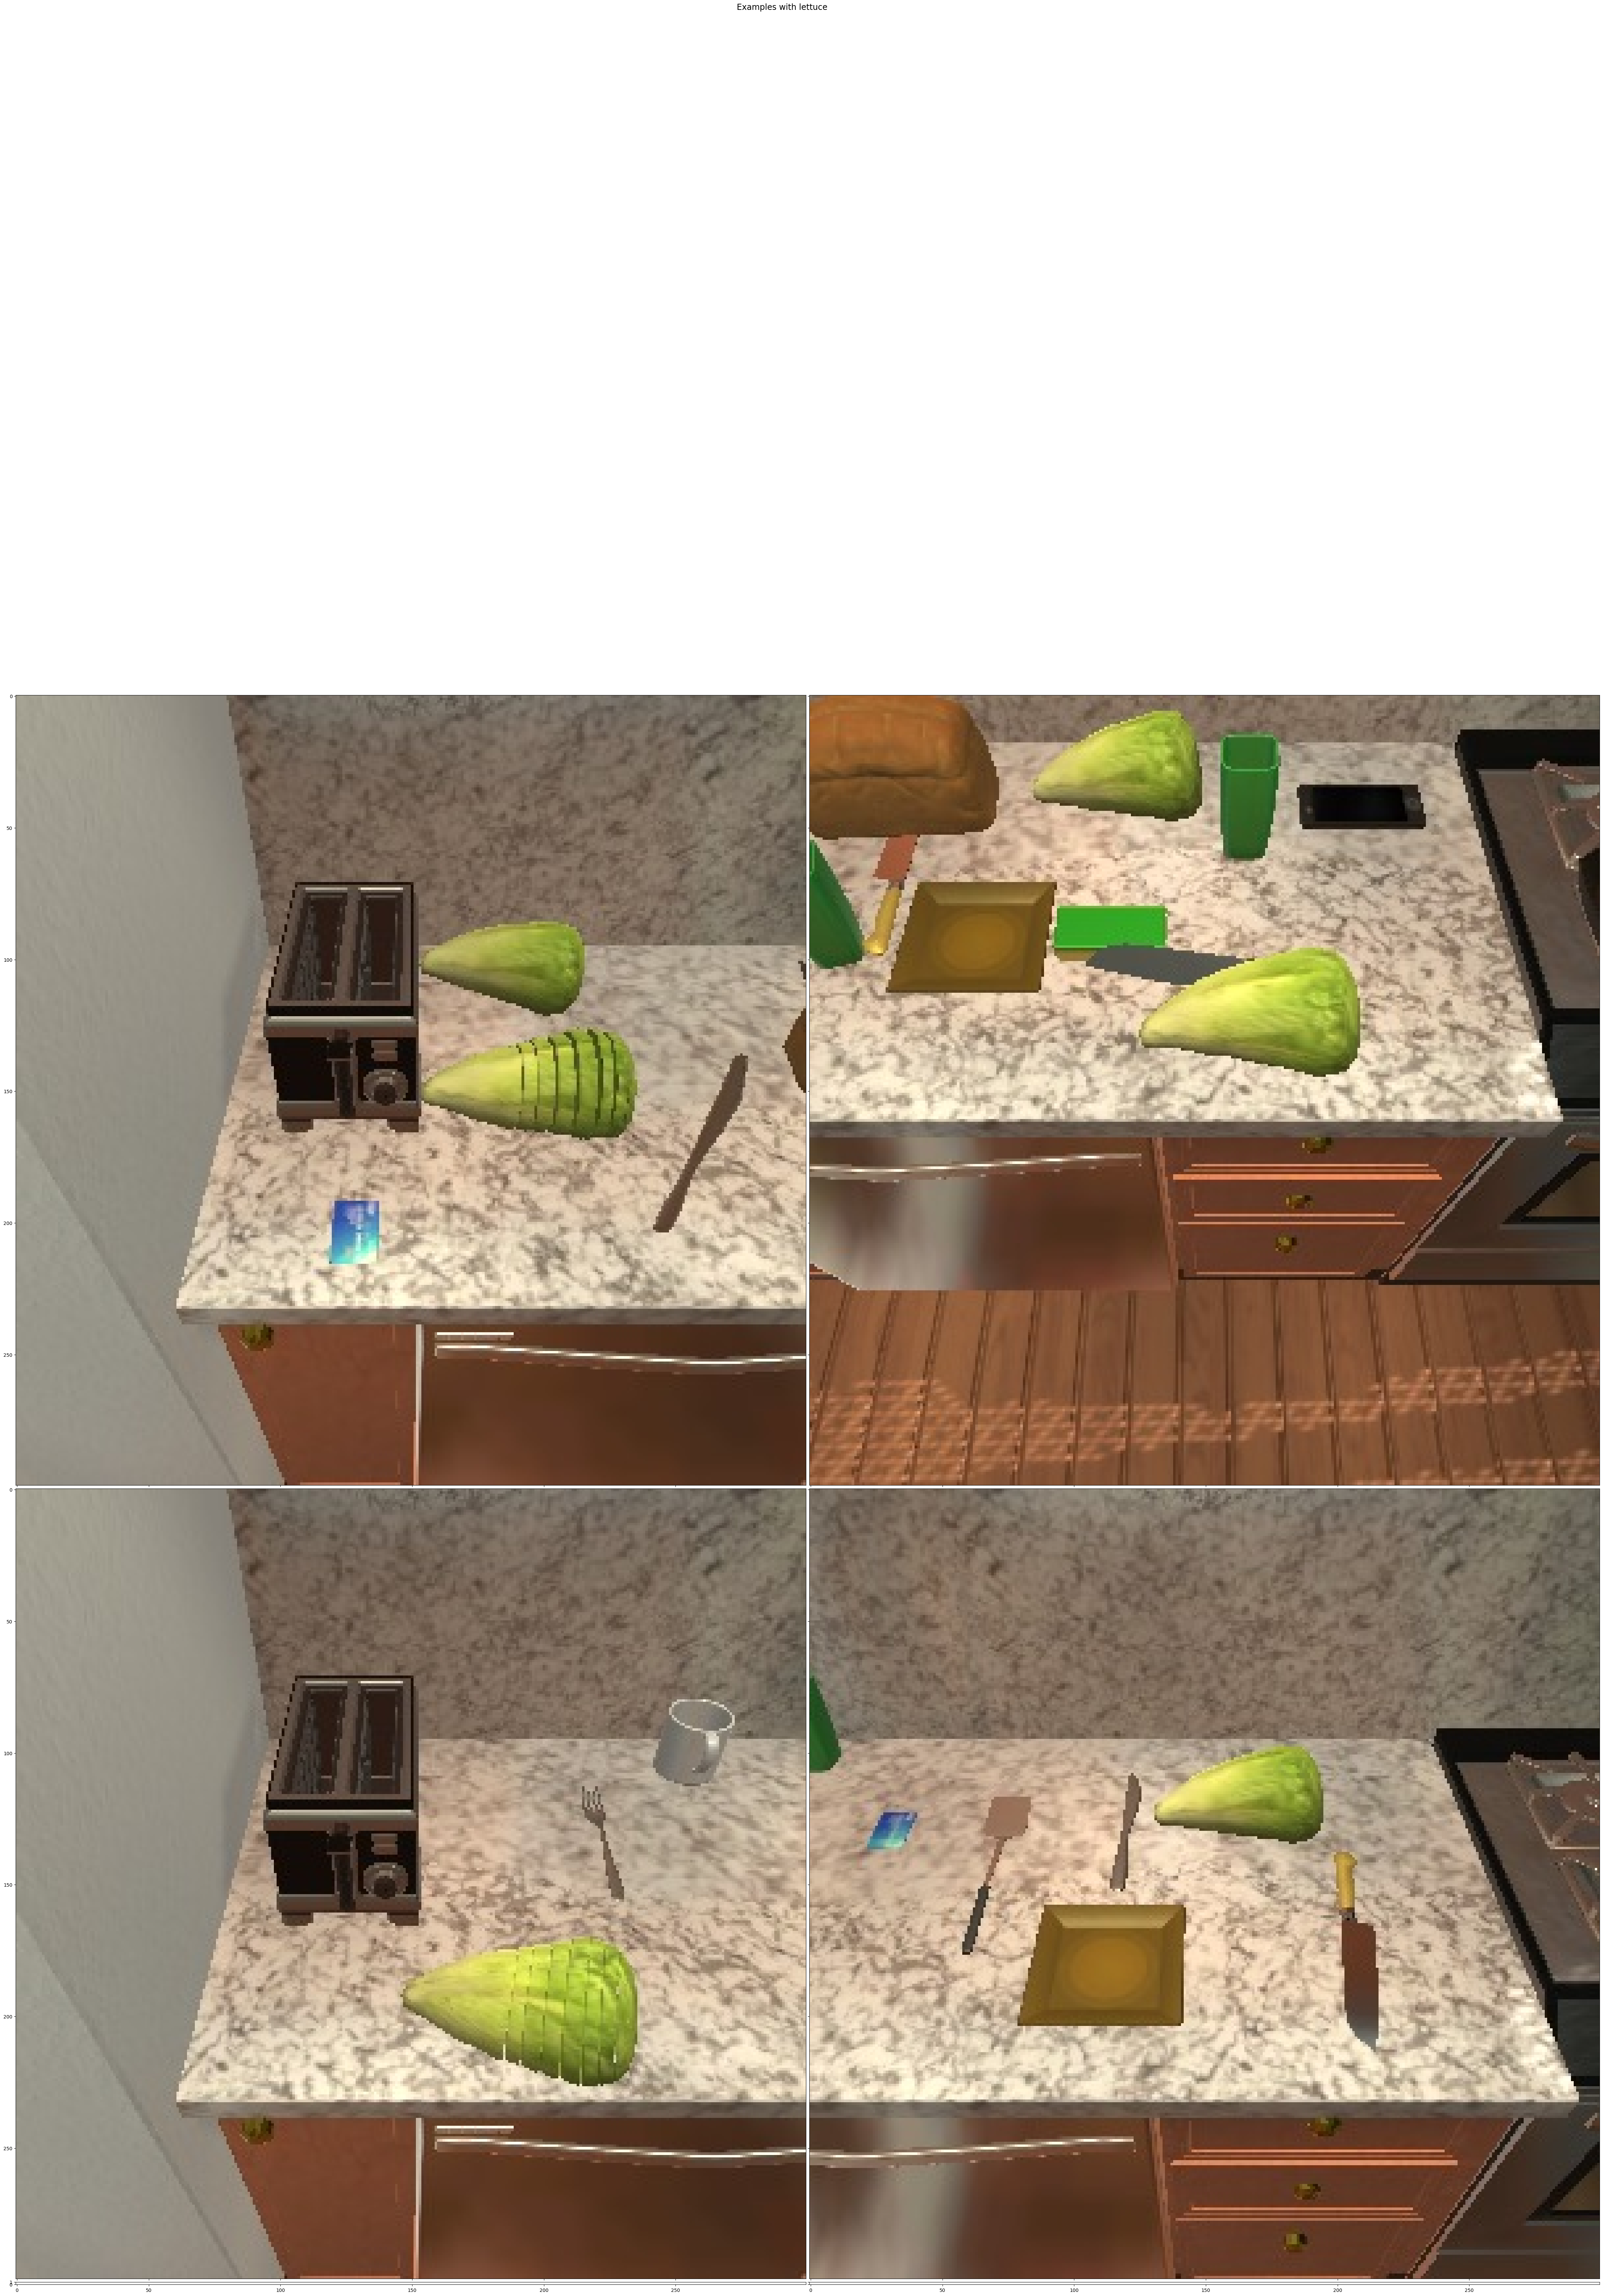

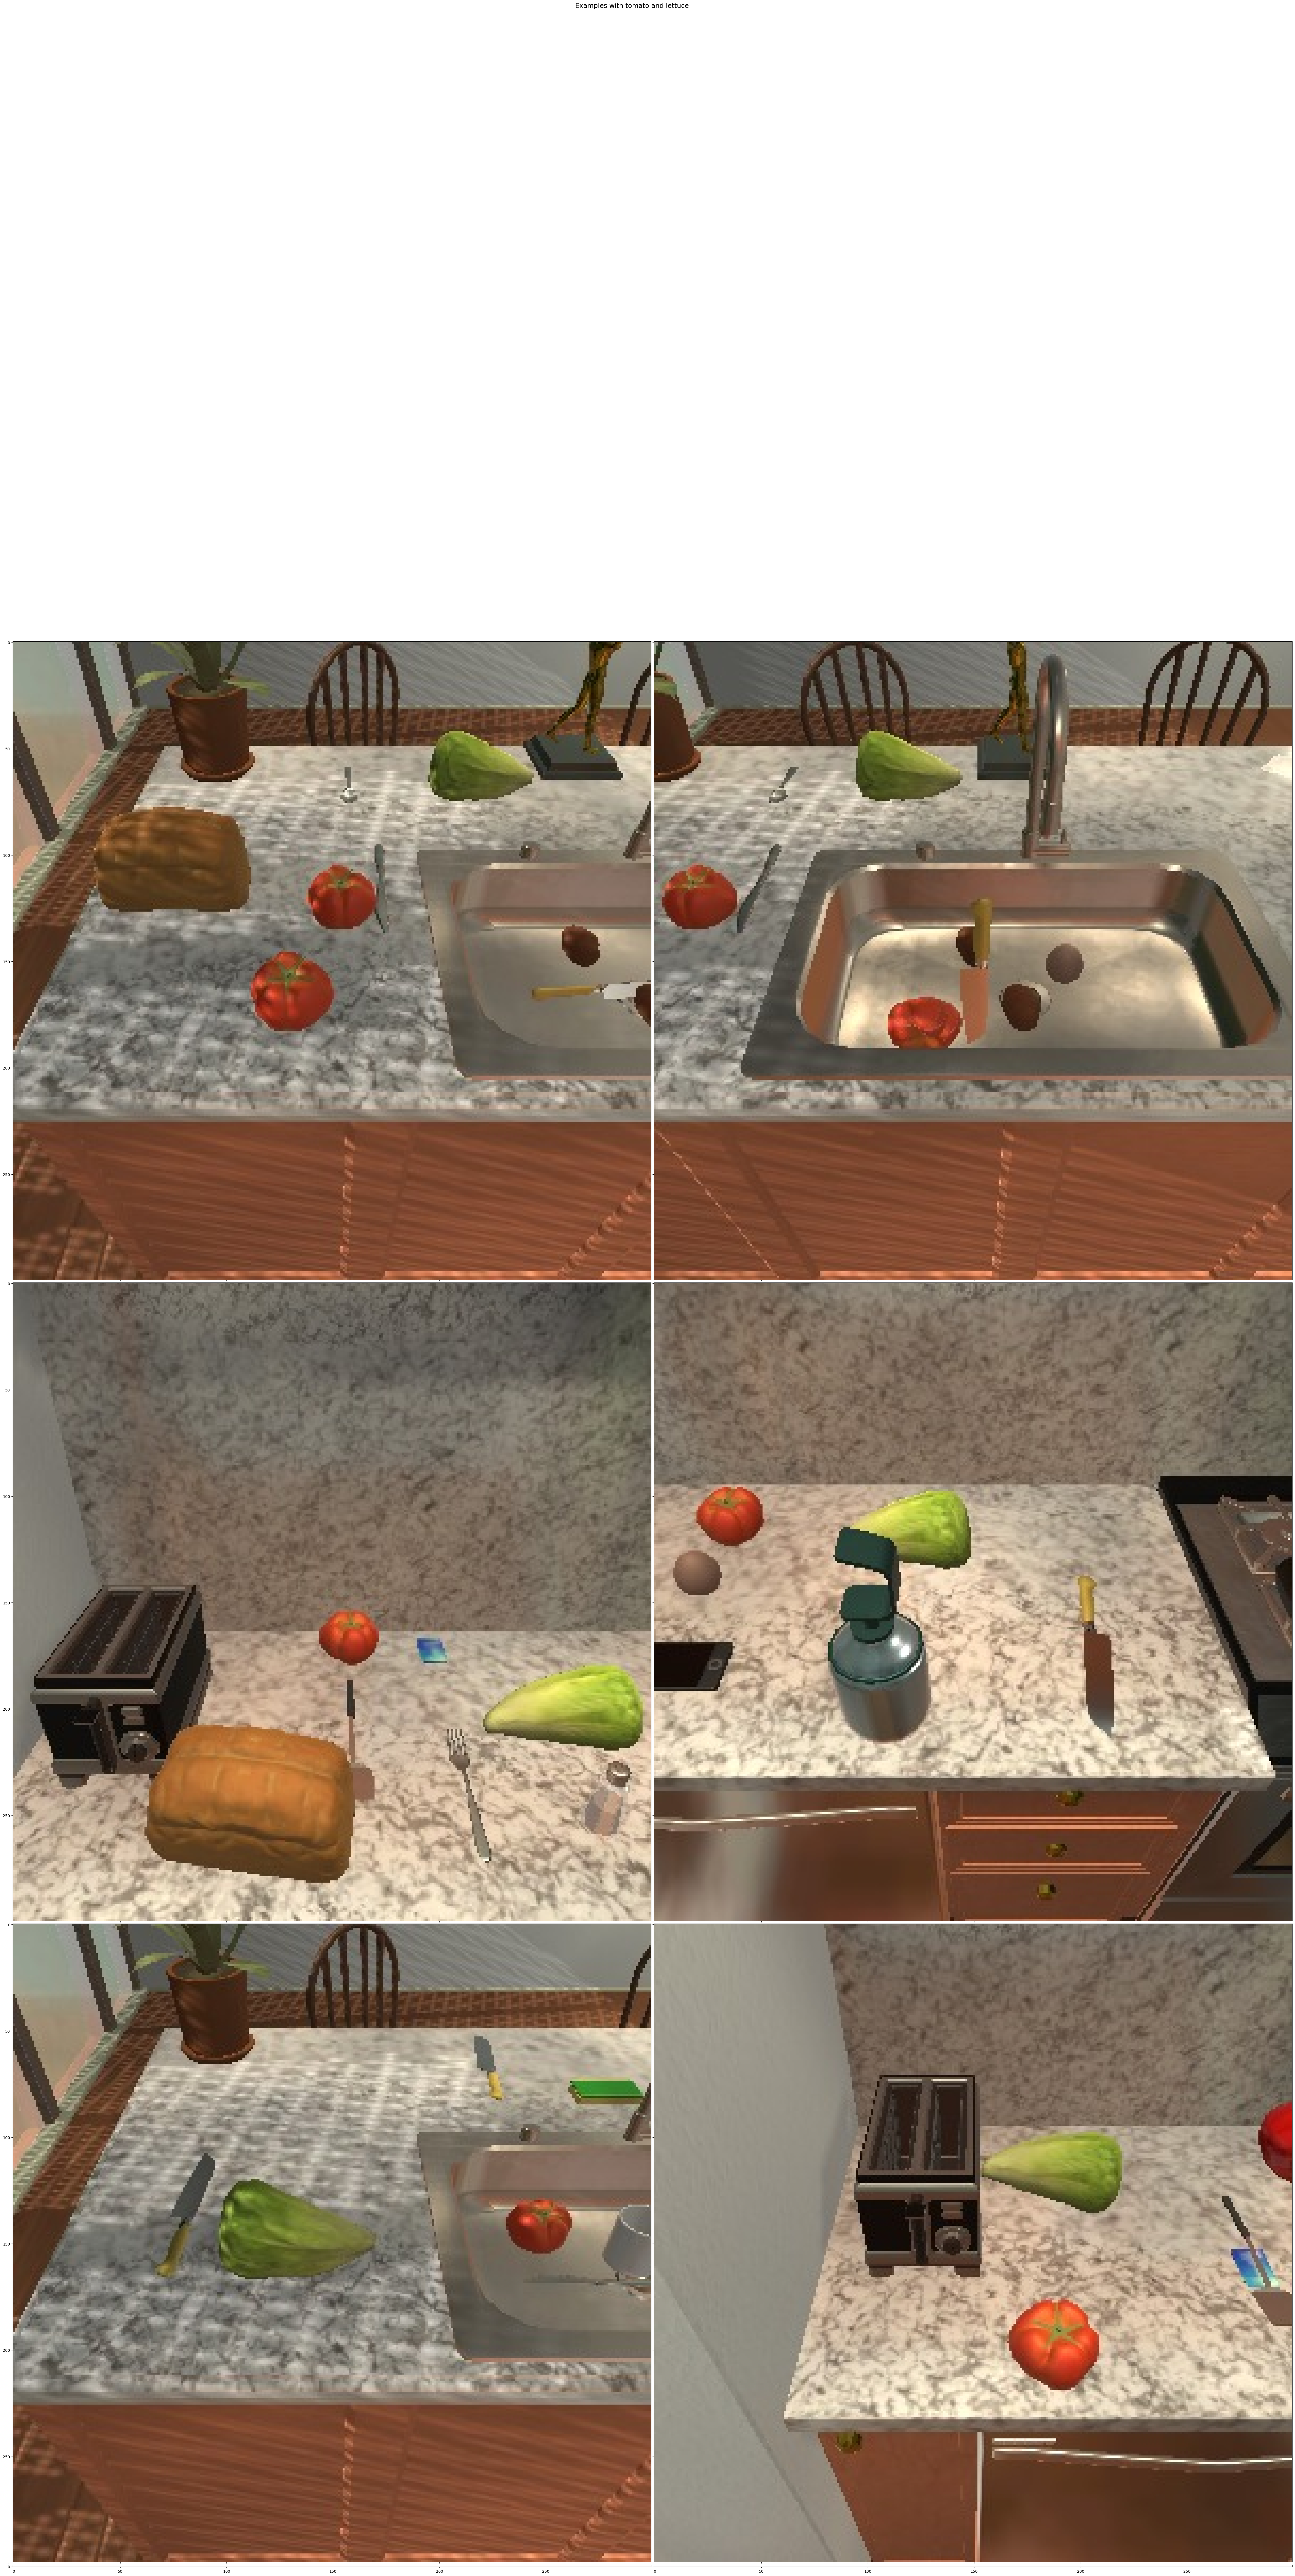

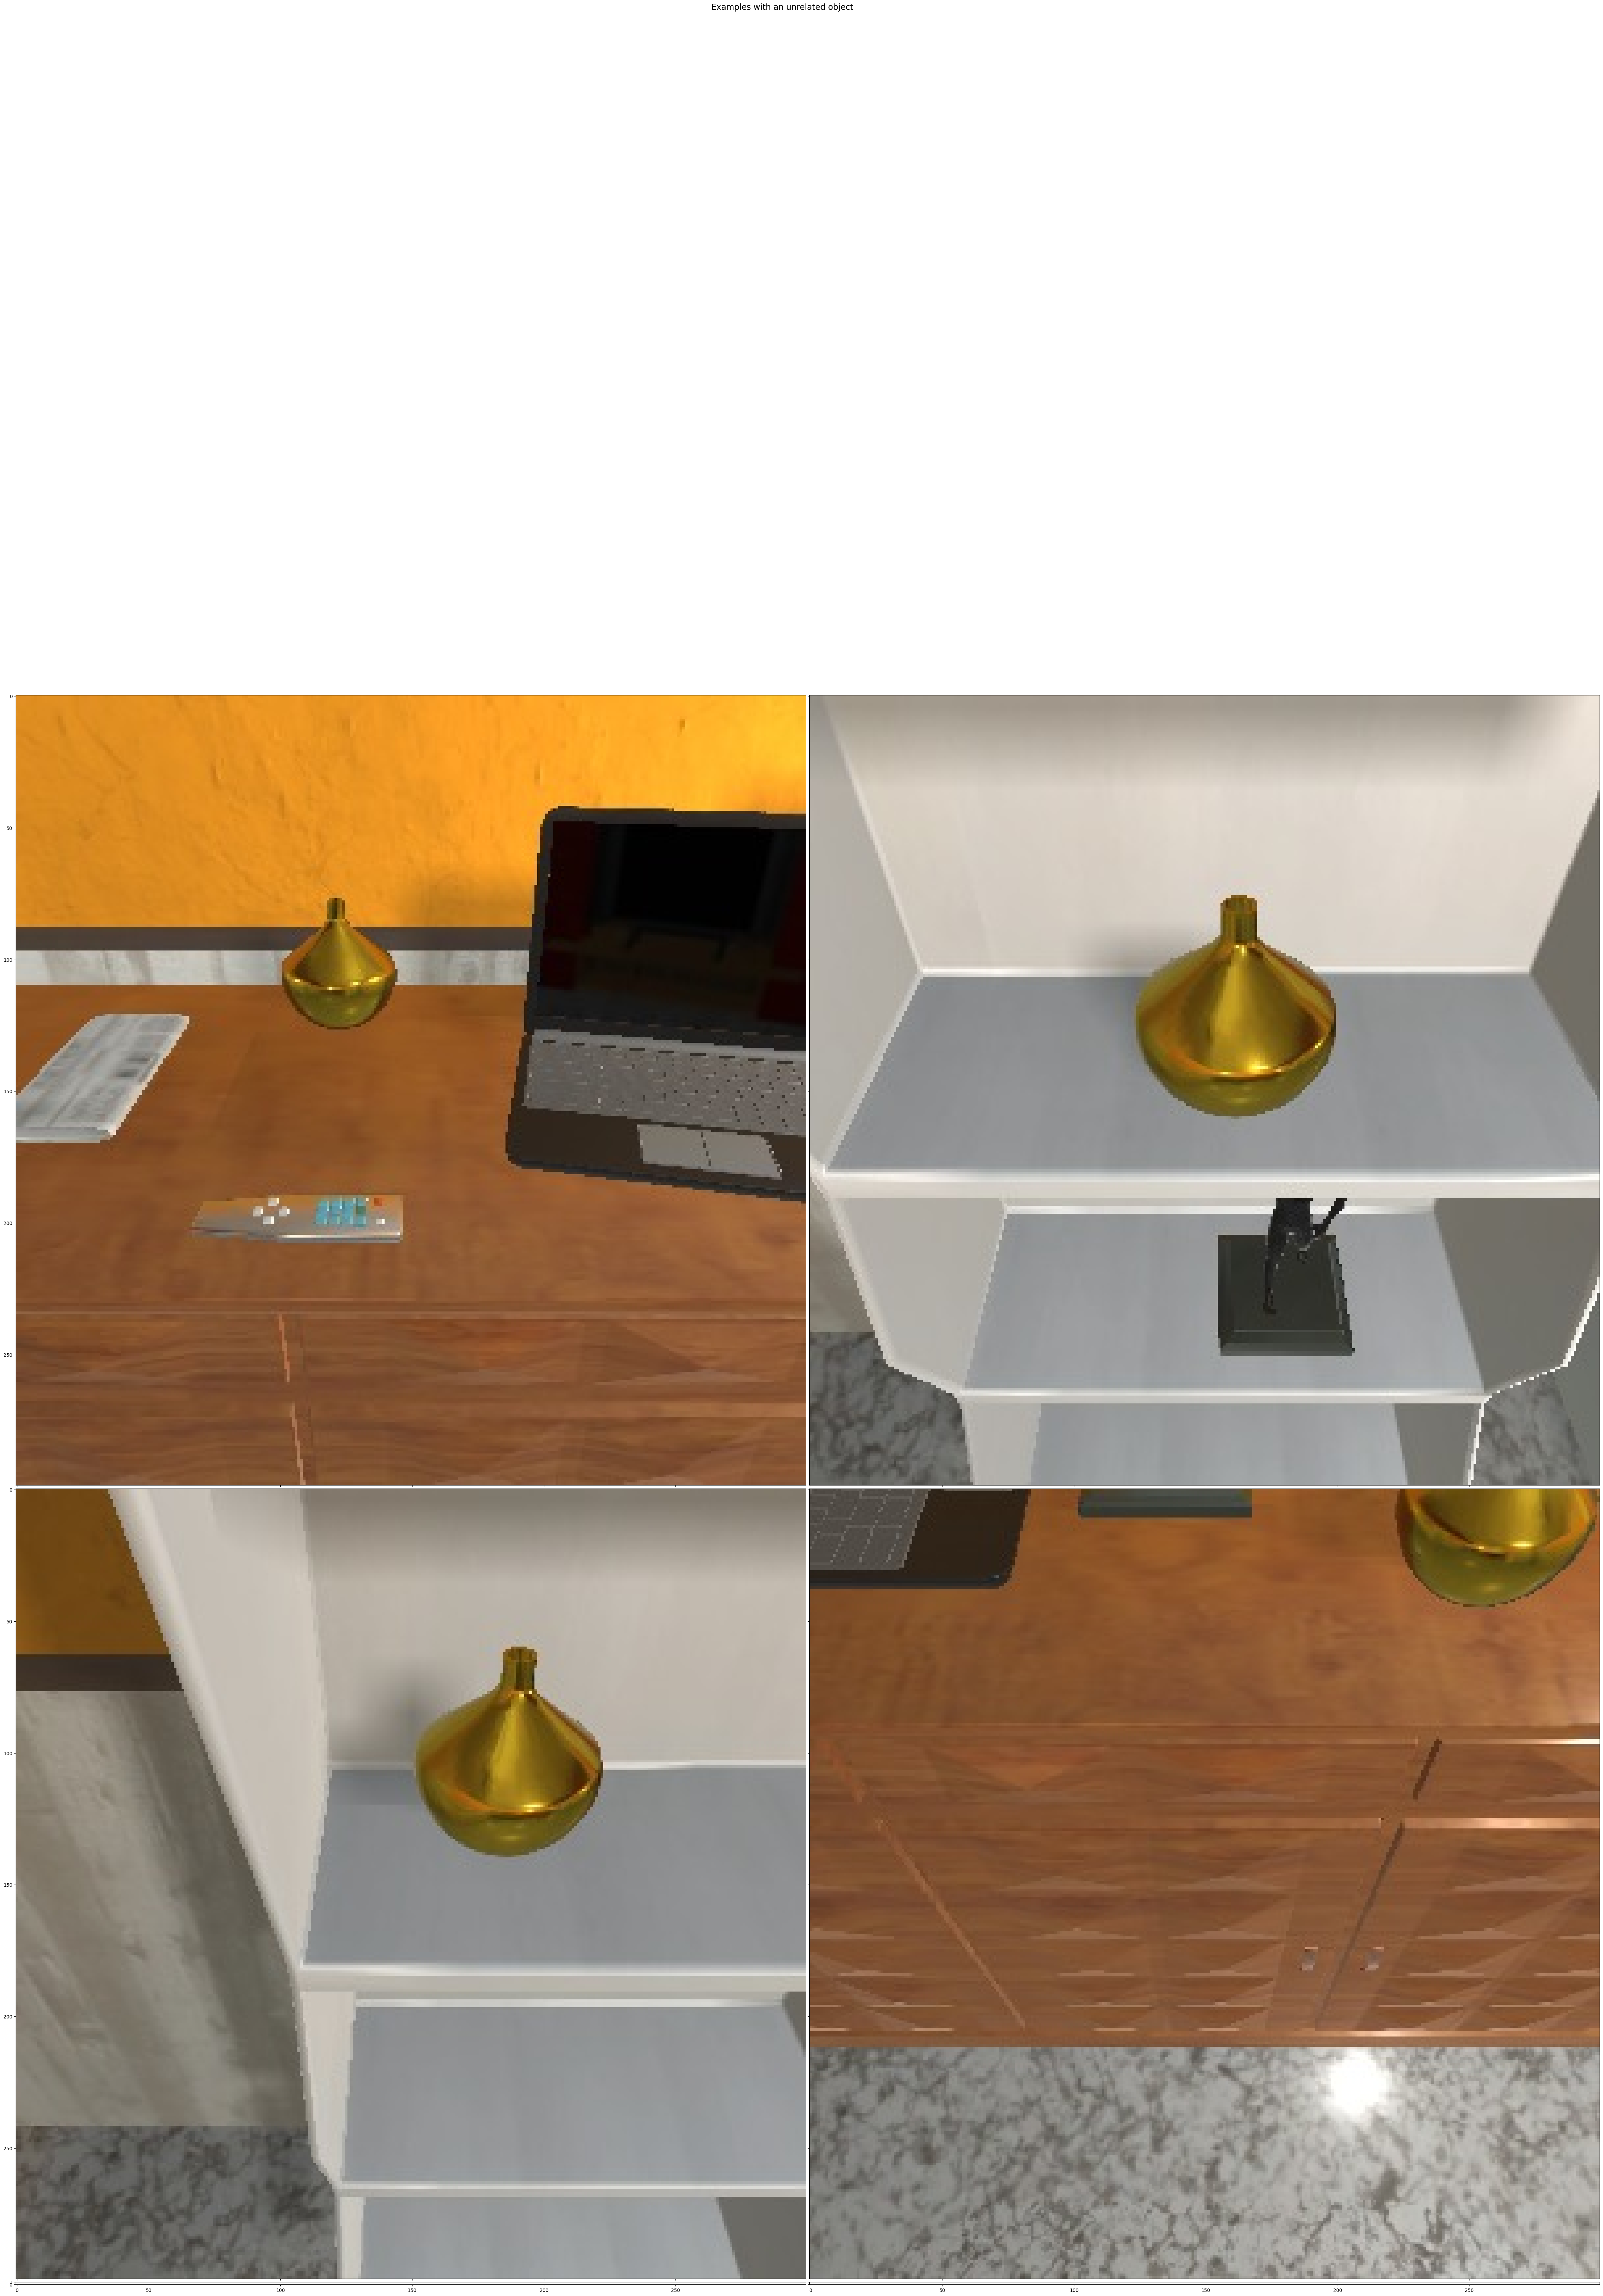

In [37]:
grounding_test.show()